In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import Image

In [2]:
def fitness_function(particles):
    # Problem expressed by the following equation:
    # f(x1, x2) = (x1 + 2* -x2 +3)^2 + (2* x1 + x2 -8)^2
    
    f1 = particles[:, 0] + 2 * -particles[:, 1] + 3
    f2 = 2 * particles[:, 0] + particles[:, 1] - 8
    z = f1**2 + f2**2
    return z

In [3]:
def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
    r1 = np.random.uniform(0, max, size=particle.shape)
    r2 = np.random.uniform(0, max, size=particle.shape)
    w = np.random.uniform(w_min, max)
    c1 = c
    c2 = c

    new_velocity = w * velocity + c1 * r1 * (pbest - particle) + c2 * r2 * (gbest - particle)

    return new_velocity

In [4]:
def update_position(particle, velocity):
    # Move particles by adding velocity
    
    particle += velocity
    return particle

In [5]:
def pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion):
    # Population
    particles = np.array([[random.uniform(position_min, position_max) for _ in range(dimension)] for _ in range(population)])
    
    # particle best position
    pbest_position = particles
    
    # Fitness
    pbest_fitness = fitness_function(particles)
    
    # Index of the best particle
    gbest_index = np.argmin(pbest_fitness)
    
    # Global best particle position
    gbest_position = pbest_position[gbest_index]
    
    # Velocity (starting from 0 speed)
    velocity = np.zeros((population, dimension))

    # List to store positions at each generation / later used for visualization
    all_positions = []

    # Loop for the number of generations
    for t in range(generation):
        # Stop if the average fitness value reached a predefined success criterion
        if np.average(pbest_fitness) <= fitness_criterion:
            break
        else:
            # Update velocity of all particles
            velocity = update_velocity(particles, velocity, pbest_position, gbest_position)

            # Move all particles to new positions
            particles = update_position(particles, velocity)
            
            # Store current particles
            all_positions.append([p.copy() for p in particles])
        
        # Calculate the fitness value
        pbest_fitness = fitness_function(particles)
        
        # Find the index of the best particle
        gbest_index = np.argmin(pbest_fitness)
        
        # Update the position of the best particle
        gbest_position = pbest_position[gbest_index]


    # Print the results
    print('Global Best Position: ', gbest_position)
    print('Best Fitness Value: ', min(pbest_fitness))
    print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
    print('Number of Generations: ', t)

    return all_positions, t

In [6]:
population = 100
dimension = 2
position_min = -100.0
position_max = 100.0
generation = 400
fitness_criterion = 10e-4

particle_positions, actual_generations = pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion)

# Plotting preparation
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

x = np.linspace(position_min, position_max, 80)
y = np.linspace(position_min, position_max, 80)
X, Y = np.meshgrid(x, y)

positions = np.stack((X.ravel(), Y.ravel()), axis = -1)
fitness_values = fitness_function(positions)
Z = fitness_values.reshape(X.shape)
ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.2)

images = []

# Add plot for each generation (within the generation for-loop)
for t in range(actual_generations): 
    particles = np.stack(particle_positions[t])
    fitness_values = fitness_function(particles)  
    image = ax.scatter3D(particles[:, 0],
                         particles[:, 1],
                         fitness_values, c='b')
    images.append([image])

# Generate the animation image and save

animated_image = animation.ArtistAnimation(fig, images, interval=200, blit=True, repeat=True)
animated_image.save('./pso_simple.gif', writer='pillow')
plt.close()

Global Best Position:  [2.60017223 2.79950852]
Best Fitness Value:  1.3560800557213555e-06
Average Particle Best Fitness Value:  0.0008377686920165029
Number of Generations:  69


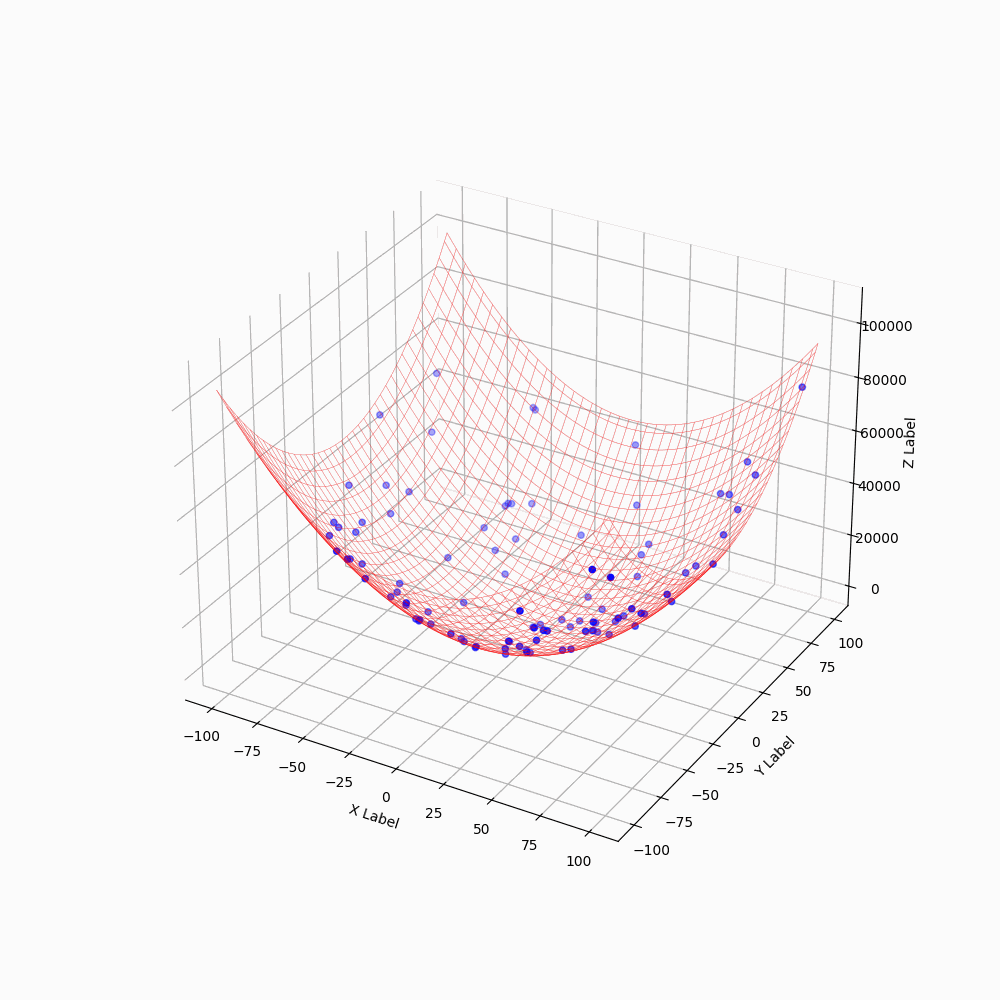

In [7]:
Image(filename='./pso_simple.gif')